# **Actividad N°1:** Estimación de Media y Varianza Empírica

***Matemáticas para Machine Learning***.

**Semana 4 - Lección 1:** Media, varianza y matriz de covarianza empírica

**Profesor:** *Fernando Lozano* - **Autor Notebook:** *César Garrido Urbano*

# Introducción

## Descripción

El presente *jupyter notebook* contiene todo el material para el desarrollo de la Tarea 1 de la Semana 4 del curso ***Matemáticas para Machine Learning***. En esta tarea usted profundizará en el calculo empírico de estadísticas como la media y la varianza a partir de datos reales.

**Objetivos de Aprendizaje:**

*   Estimar estadísticas como media y varianza de un set de datos.
*   Comprender los efectos que tienen la cantidad de datos disponibles en la estimación de media y varianza.
*   Entender el concepto de media y varianza estimada como una variable aleatoria.
*   Analizar las distribuciones de las estimaciones de media y varianza.



## Teoría


La estimación de parámetros es una de las herramientas que nos brinda la estadistica para estudiar y entender los datos que deseamos analizar. No obstante, un error común que se comete es el de creer que los valores que se estiman representan de forma completa y fidedigna la distribución o los datos que se analizan.

Es por esto, que vale la pena ahondar en la idea de **estimadores**, pues al calcular estadísticas como la *media* o la *varianza*, no se están calculando los valores que describen exactamente a la población (los cuales también se conocen como parámetros), sino que se estan **estimando**. En últimas, estos estimadores resultan ser variables aleatorias por sí mismas!

Así las cosas, a continuación se presenta como se calculan algunos de los estimadores más comunes. Note que estas estimaciones dependen completamente de la muestra (subset) de datos $y$ que se tenga.

**Media artimetica:** 

\begin{equation}
\bar{y} = \frac{1}{n}\left( \sum_{i=1}^k y_i \right)
\end{equation}



**Varianza:**

\begin{equation}
var(y) = \frac{1}{n-1}\left(\sum_{i=1}^n (y_i - \bar{y})^2 \right)
\end{equation}

**Desviación Estándar:**

\begin{equation}
\bar{\sigma_y} = \sqrt{var(y)}
\end{equation}

## Metodología

En esta tarea usted calculará de forma empírica la media y la varianza para una distribución desconocida para distintos números de muestras y analizará las distribuciones de dichos estimadores.

Para desarrollar el taller usted deberá editar las celdas de código dispuestas para esto. Estas estarán marcadas con el siguiente comentario:

```python
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================
```

Edite o complete el códgio dentro de estas lineas de comentarios. Dentro de estos comentarios encontrará indicaciónes de lo que debe hacer, así como algunas de las variables que debe utilizar o calcular (puede que estas tengan ya una estructura dada pero el valor no sea el definitivo, verifique y complete la asignación).

# Problema

## Inicialización

In [1]:
# Librerias principales
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

# Maia Utils
sys.path.append('../')
from MaiaUtils_S4TP1 import MaiaUtils

In [2]:
# Maia Utis
maia = MaiaUtils()

# Crear función para ocultar seguimiento de debugging
if "toggle_traceback" not in globals():
    ipython = get_ipython()
    toggle_traceback = maia.manipulate_ipython(ipython)

In [3]:
#toggle_traceback = maia.manipulate_ipython(get_ipython())

In [4]:
# Cambiar configuración de debugging
toggle_traceback()

## Datos

Usted tiene acceso a $n$ muestras de datos de una distribución completamente desconocida en una dimensión. Puede acceder a estas muestras a partir de la función $generar\_datos()$ del módulo $\texttt{MaiaUtils}$. 

In [5]:
maia.generar_datos(n=10)

array([1817.73794507, 1647.50130474, 1601.87698278, 1584.22126535,
       1739.12740634, 1700.99603851, 1772.46315493, 1586.79274093,
       1507.04162299, 1590.24479691])

### Estimación con 5 / 50 / 5000 datos



Complete la siguiente función en donde estima la media y la varianza de un set de datos que entra como parámetro.

In [9]:
def estimar_estadisticas(datos):
    """
    Realiza la estimación de estadísticas de media, varianza y desviación estándar de los datos
    que ingresan como parámetro.
    ___________________________________
    Entrada:
    datos:       [numpy.array] Arreglo de datos en una dimensión a los que se le estiman las estadisticas.
    ___________________________________
    Salida:
    media:       [float] Estimación de la media de los datos.
    varianza:    [float] Estimación de la varianza de los datos.
    sigma:       [float] Estimación de la desviación estándar de los datos.

    """
    # =====================================================
    # COMPLETAR ===========================================
    mu = np.mean(datos)
    var = np.var(datos)
    sigma = np.std(datos)

    # =====================================================

    return mu, var, sigma


Calcule también la desviación estandar a partir de la varianza estimada.

In [10]:
# Estimar para 5 / 50 / 5000 datos
mu_5, var_5, sigma_5 = estimar_estadisticas(maia.generar_datos(n=5))
mu_50, var_50, sigma_50 = estimar_estadisticas(maia.generar_datos(n=50))
mu_5000, var_5000, sigma_5000 = estimar_estadisticas(maia.generar_datos(n=5000))

In [11]:
# Verificar Estimaciones
maia.verificar_estimaciones(mu_5000, var_5000, sigma_5000)

1729.5010016708084
1719.0
1739.0
Estimación de la media +++NOTA DE ALEJANDRA
Muy bien! La estimación de la media parece ser correcta

Estimación de la varianza:
Muy bien! La estimación de la varianza parece ser correcta

Verificación de la estimación de la desviación estándar:
Muy bien! La estimación de la la desviación estándar parece ser correcta



Asumamos que la distribución original de los datos es normal (tiene un comportamiento de campana de Gauss). A continuación se grafican estas distribuciones con base en la media y varianza estimadas.

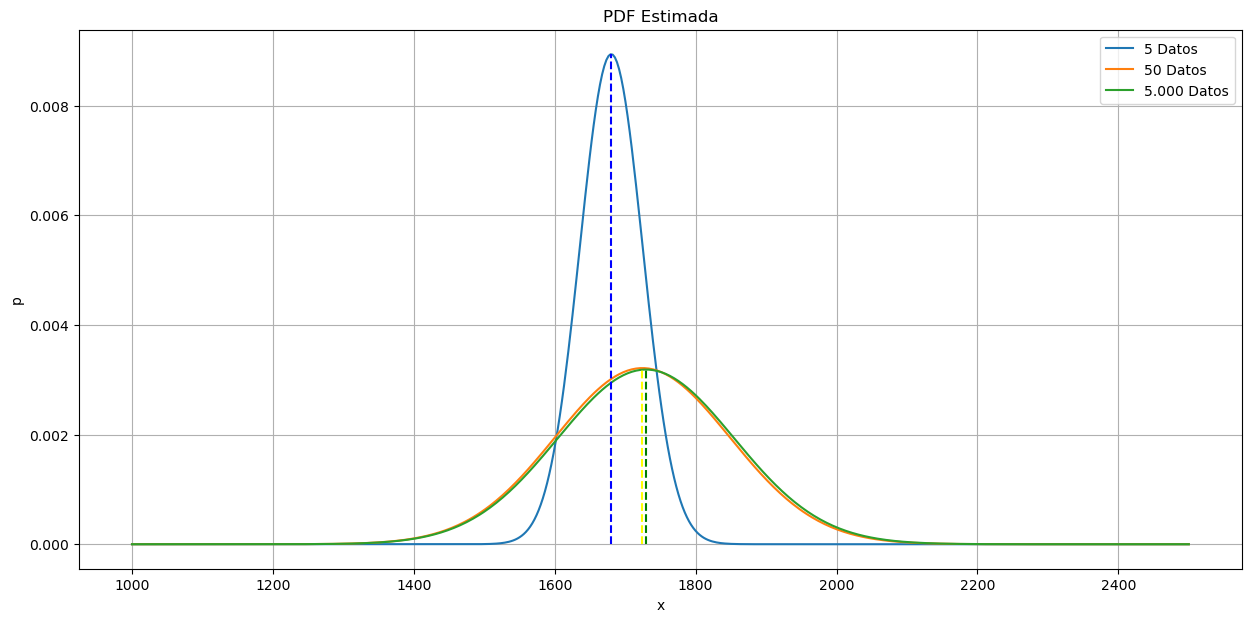

In [12]:
# Rango
x = np.linspace(1000, 2500, 500)

# Funciones Normales
norm_5 = norm.pdf(x, mu_5, sigma_5)
norm_50 = norm.pdf(x, mu_50, sigma_50)
norm_5000 = norm.pdf(x, mu_5000, sigma_5000)

# Grafica
fig = plt.figure(figsize = (15, 7)) 

# Funciones
plt.plot(x, norm_5, label='5 Datos')
plt.plot(x, norm_50, label='50 Datos')
plt.plot(x, norm_5000, label='5.000 Datos')

# Medias
plt.vlines(x=[mu_5, mu_50, mu_5000], 
           ymin=0, ymax=[max(norm_5), max(norm_50), max(norm_5000)],
           colors=['blue', 'yellow', 'green'], ls='--', lw=1.5)

# Layout
plt.title('PDF Estimada')
plt.xlabel('x')
plt.ylabel('p')
plt.grid(True)
plt.legend()
plt.show()

Repita varias veces el proceso (ejecute varias veces la celdas anteriores). ¿Qué cambios observa en las funciones estimadas? ¿Cúal de estas cree que representa de mejor forma la distribución original de los datos?

## Distribución Media y Varianza

Cómo ya pudo evidenciar, el cálculo de la varianza depende del número de datos de muestra y varía con cada toma de muestra.

Para entender de mejor manera como varian las estimaciones de varianza y media , escriba una función que calcule $n\_rep$ número de estimaciones sobre un número $n\_datos$ de datos y retorne un arreglo con todos los valores de media y varianza estimados.

### Múltiples repeticiones

In [20]:
def estimacion_repetida(n_datos, n_rep):
    """
    Realiza n_rep repeticiones de la estimación de estadísticas con n_datos y guarda los valores estimados.
    Es decir, genera n_datos, guarda estimaciones y repite este proceso n_rep veces.
    ___________________________________
    Entrada:
    n_datos:     [int] Número de datos con los que se va a estimar las estadísticas.
    n_rep        [int] Número de repeticiones que se van a realizar las estimaciones
    ___________________________________
    Salida:
    media:       [numpy.array] Vector con todas las estimaciones de media realizadas.
    varianza:    [numpy.array] Vector con todas las estimaciones de varianza realizadas.
    sigma:       [numpy.array] Vector con todas las estimaciones de desviación estándar realizadas.

    """
    
    media = []
    varianza = []
    sigma = []

    # =====================================================
    # COMPLETAR ===========================================
    for i in range(n_rep):
        # Generar datos aleatorios
        mu_i, var_i, sigma_i = estimar_estadisticas(maia.generar_datos(n=n_datos))
        media.append(mu_i)
        varianza.append(var_i)
        sigma.append(sigma_i)
    # =====================================================

    return np.array(media), np.array(varianza), np.array(sigma)


In [21]:
# Parametros
n_datos = 1000
n_rep = 1000

# Estimación repetida
media, varianza, sigma = estimacion_repetida(n_datos, n_rep)

In [23]:
# Verificacion de estimacion repetida
maia.verificar_estimacion_repetida(media, varianza, n_datos, n_rep)

Verificación estimaciones repetidas:

1729.250307729119
1727.0
1731.0
Estimación de la media +++NOTA DE ALEJANDRA
Muy bien! La estimación de la media parece ser correcta

Estimación de la varianza:
Muy bien! La estimación de la varianza parece ser correcta

Verificación de la estimación de la desviación estándar:
Muy bien! La estimación de la la desviación estándar parece ser correcta



### Visualización

Finalmente, para evidenciar el comportamiento de la estimación, calcule la media, la varianza y la desviación estandar de los estimadores. Es decir, utilice ahora los valores de media y de varianza estimados con la función anterior, como sus datos de entrada para la función de estimar_media y varianza.

In [24]:
# =====================================================
# COMPLETAR ===========================================
# 

mu_media = np.mean(media)
sigma_media = np.mean(sigma)

mu_var = np.var(media)
sigma_var = np.var(sigma)

# =====================================================

In [25]:
mu_var

14.935650340481336

Visualicemos ahora en un historama de la frecuencia con la que los valores de media caen y la distribución normal estimada sobre estos datos.

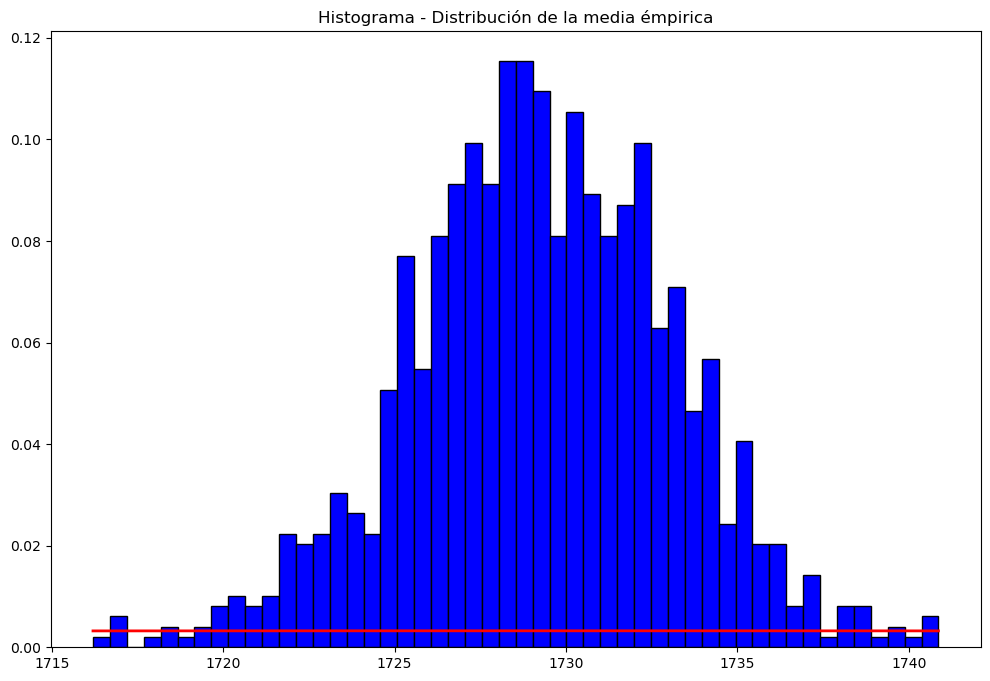

In [26]:
# Graficar distribucion de la media
fig = plt.figure(figsize = (12, 8)) 
count, bins, ignored = plt.hist(media, 50, density=True, edgecolor='black', facecolor='b')
plt.plot(bins, norm.pdf(bins, mu_media, sigma_media), color='r', lw=2)
plt.title("Histograma - Distribución de la media émpirica")
plt.show()

Repitamos ahora la visualización con un histograma pero para los datos de varianza.

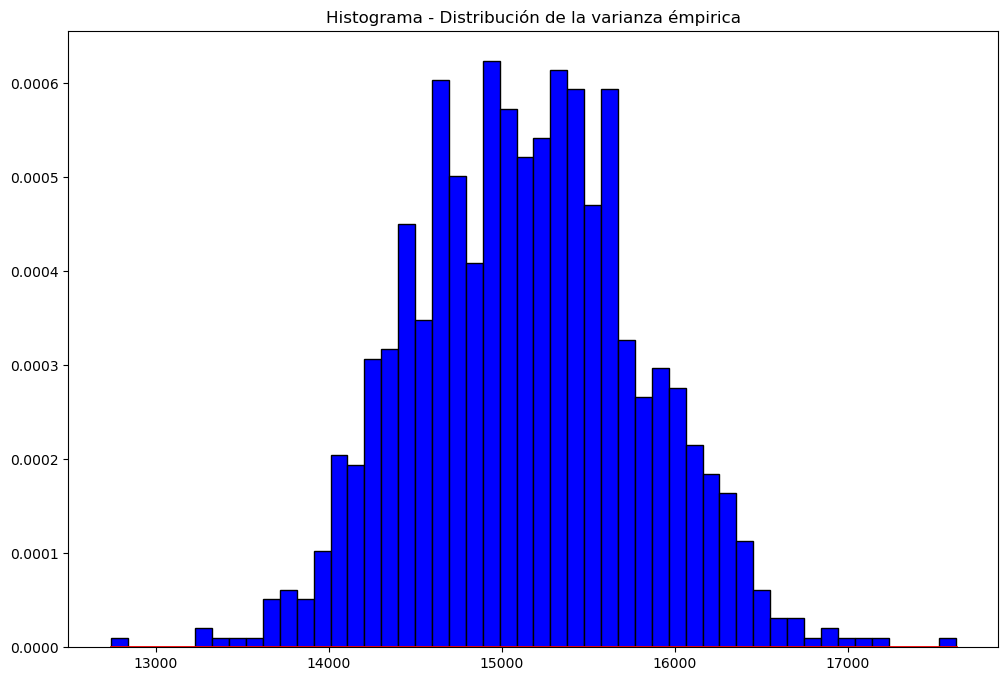

In [27]:
# Graficar distribucion de la varianza
fig = plt.figure(figsize = (12, 8)) 
count, bins, ignored = plt.hist(varianza, 50, density=True, edgecolor='black', facecolor='b')
plt.plot(bins, norm.pdf(bins, mu_var, sigma_var), color='r', lw=2)
plt.title("Histograma - Distribución de la varianza émpirica")
plt.show()

Observe detalladamente la distribución de los datos en el histograma y la función normal estimada ¿realmente coincide la distribución normal estimada con la distribución de los datos? Compare con los resultados obtenidos para la media.

Pruebe distintos valores de datos y de repeticiones. ¿Cuál cree que puede ser la verdadera distribución de las estimaciones de la varianza?

# Referencias Complementarias

Para verificar la correcta distribución del estimador de varianza y revisar en detalle las demostraciones en las que se derivan las distribuciones de las variables aleatorias de los estimadores de *media* y *varianza*, puede revisar el siguiente artículo:

Taboga, Marco (2021). "Estimation of the variance", *Lectures on probability theory and mathematical statistics*. Kindle Direct Publishing. Online appendix. (statlect.com/fundamentals-of-statistics/variance-estimation)

Para una explicación rápida y sencilla del proceso de estimación estadístico, refiérase al siguiente artículo:

Chandra, Trisha (2021) "Performing Statistical Estimation", *TowardsDataScience* (towardsdatascience.com/performing-statistical-estimation-82368ad89486)


Puede utilizar la extensión de google chrome para traducir cualquier articulo: *Click derecho* -> *Traducir a español*.